<a href="https://www.kaggle.com/code/mrafraim/dl-day-16-overfitting-vs-underfitting?scriptVersionId=287958170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 16: Overfitting vs Underfitting

Welcome to Day 16!

Today you will learn:
- What underfitting and overfitting actually mean
- How to recognize them using loss curves
- Why training loss alone is misleading
- The role of model capacity and data
- Bias-Variance tradeoff

If you found this notebook helpful, your **<b style="color:red;">UPVOTE</b>** would be greatly appreciated! It helps others discover the work and supports continuous improvement.

---

# Training Loss vs Validation Loss

In machine learning, the objective is generalization, learning patterns that perform well on unseen data, not memorizing the training set. To evaluate this, we monitor two distinct loss metrics.

## Training Loss
 
Training loss measures the error between the model’s predictions and the true labels on the training dataset, the data the model directly learns from during optimization.

**Purpose:**  
- Indicates how well the model is fitting the training data  
- Directly minimized by the learning algorithm (e.g., gradient descent)
 
A consistently decreasing training loss shows that the model is learning patterns from the data.  
However, low training loss alone is not sufficient, it may indicate memorization rather than understanding.

> Training loss tells you how well the model learns.

## Validation Loss

Validation loss measures the error between the model’s predictions and the true labels on a separate, unseen validation dataset that is not used for weight updates.

**Purpose:**  
- Estimates how well the model generalizes to new data  
- Acts as an early warning signal for overfitting
 
Validation loss reflects real-world performance. If validation loss stops improving or starts increasing while training loss continues to decrease, the model is **overfitting**.


> Validation loss tells you whether the model understands.


### Why Both Losses Matter

| Training Loss Behavior | Validation Loss Behavior | What’s Really Happening |
|-----------------------|--------------------------|-------------------------|
| High and flat | High and flat | **Underfitting**: model capacity too low or learning hasn’t started |
| Decreasing | High and unstable | **Memorization without learning**: model fits training data but fails to generalize |
| Low and stable | Low and stable | **Healthy generalization**: model captures true data patterns |
| Continuously decreasing | Starts increasing | **Overfitting**: model learns noise instead of signal |


# Underfitting, Overfitting and Good Fit

## Underfitting
- Model is too simple
- Cannot capture patterns in data
- High training loss
- High validation loss

## Overfitting
- Model is too complex
- Memorizes training data
- Very low training loss
- High validation loss

## Good Fit
- Training loss decreases
- Validation loss decreases and stabilizes

# Simulated Loss Curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 51)


## Underfitting Curves

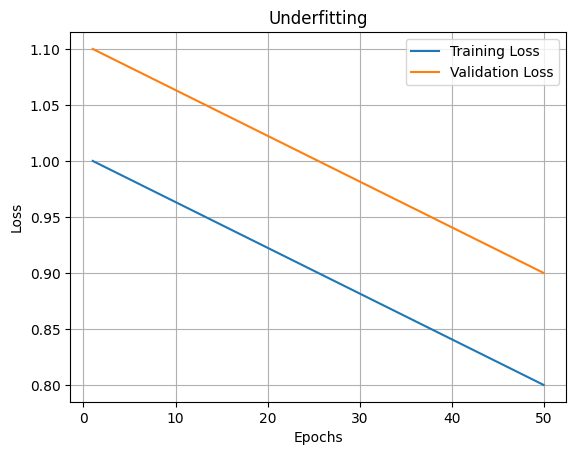

In [2]:
train_loss_under = np.linspace(1.0, 0.8, 50)
val_loss_under = np.linspace(1.1, 0.9, 50)

plt.figure()
plt.plot(epochs, train_loss_under, label="Training Loss")
plt.plot(epochs, val_loss_under, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Underfitting")
plt.legend()
plt.grid(True)
plt.show()


Both losses remain high → model capacity is insufficient.

## Overfitting Curves

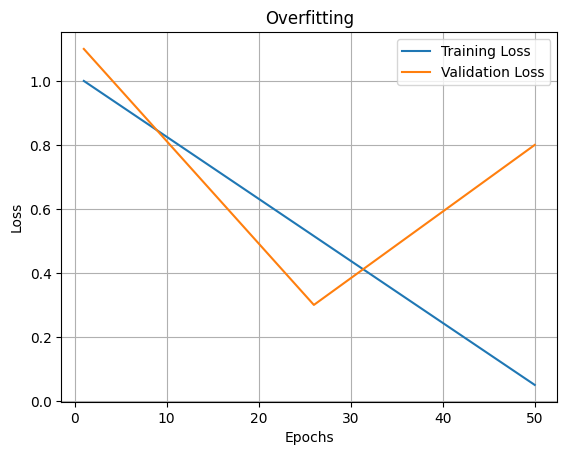

In [3]:
train_loss_over = np.linspace(1.0, 0.05, 50)
val_loss_over = np.concatenate([
    np.linspace(1.1, 0.3, 25, endpoint=False),
    np.linspace(0.3, 0.8, 25)
])

plt.figure()
plt.plot(epochs, train_loss_over, label="Training Loss")
plt.plot(epochs, val_loss_over, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Overfitting")
plt.legend()
plt.grid(True)
plt.show()


Training loss keeps decreasing,
but validation loss increases → memorization, not learning.


## Good Fit Curves

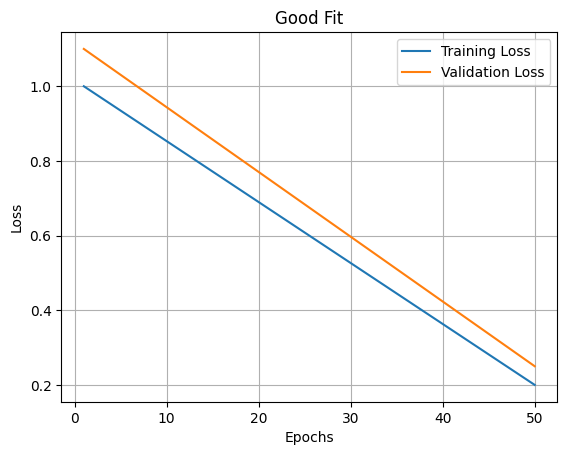

In [4]:
train_loss_good = np.linspace(1.0, 0.2, 50)
val_loss_good = np.linspace(1.1, 0.25, 50)

plt.figure()
plt.plot(epochs, train_loss_good, label="Training Loss")
plt.plot(epochs, val_loss_good, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Good Fit")
plt.legend()
plt.grid(True)
plt.show()


Both losses decrease and stay close → good generalization.


# Bias and Variance

## Bias

Bias is the error introduced by oversimplifying assumptions in the model.

A high-bias model:
- Is too simple for the problem
- Misses important patterns
- Makes similar errors across different datasets
- Leads to underfitting

Formula (squared bias contribution to error):

$$
\text{Bias}^2 = \left( \mathbb{E}[\hat{f}(x)] - f(x) \right)^2
$$

Meaning of terms:
- $\hat{f}(x)$: Prediction from your model  
- $f(x)$: True underlying function (ground truth)  
- $\mathbb{E}[\hat{f}(x)]$: Average prediction over many datasets  

Intuition:
> The model is consistently wrong in the same way.

## Variance

Variance is the error introduced by excessive sensitivity to the training data.

A high-variance model:
- Is too complex
- Fits noise instead of signal
- Changes predictions drastically with small data changes
- Leads to overfitting

Formula (variance contribution to error):

$$
\text{Variance} = \mathbb{E} \Big[ (\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2 \Big]
$$

Meaning of terms:
- $\hat{f}(x)$: Prediction from your model  
- $\mathbb{E}[\hat{f}(x)]$: Average prediction over many datasets  

Intuition:
> The model is *too reactive* to the data it sees.

## Noise

Noise is the irreducible error present in the data itself.

- Comes from measurement errors, randomness, or missing variables
- Cannot be eliminated, only managed
- Sets a lower bound on achievable error

Formula (noise contribution):

$$
\text{Noise} = \sigma^2 = \mathbb{E}[(y - f(x))^2]
$$

Meaning of terms:
- $y$: Observed output  
- $f(x)$: True underlying function  


## Total Expected Error

The total expected squared error can be decomposed as:

$$
\mathbb{E}[(y - \hat{f}(x))^2] = 
\underbrace{ \left( \mathbb{E}[\hat{f}(x)] - f(x) \right)^2 }_{\text{Bias}^2} 
+ \underbrace{ \mathbb{E} \Big[ (\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2 \Big] }_{\text{Variance}} 
+ \underbrace{\sigma^2}_{\text{Noise}}
$$

Meaning of terms:
- $\mathbb{E}[(y - \hat{f}(x))^2]$: Total expected squared error  
- $\left( \mathbb{E}[\hat{f}(x)] - f(x) \right)^2$: Error from model oversimplification (bias²)  
- $\mathbb{E} \Big[ (\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2 \Big]$: Error due to model sensitivity (variance)  
- $\sigma^2$: Irreducible error (noise)

## Relationship to Loss Curves

| Scenario | Bias | Variance | Training Loss | Validation Loss |
|--------|------|----------|---------------|-----------------|
| Underfitting | High | Low | High | High |
| Good Fit | Balanced | Balanced | Low | Low |
| Overfitting | Low | High | Very Low | High |


- Increasing model complexity ↓ bias ↑ variance
- Decreasing complexity ↑ bias ↓ variance

There is no free lunch, good models balance both.

# Bias–Variance Tradeoff

The bias–variance tradeoff describes the tension between:
- Making a model **too simple** (high bias)
- Making a model **too complex** (high variance)

As model complexity increases:
- **Bias decreases**
- **Variance increases**

You cannot minimize both at the same time.

## Intuition

- Simple models (e.g., linear regression):
  - Make strong assumptions
  - Miss complex patterns
  - High bias, low variance

- Complex models (e.g., deep networks):
  - Learn intricate patterns
  - Are sensitive to noise
  - Low bias, high variance

The goal is to find a sweet spot where total error is minimized.

## Mapping to Model Behavior

| Model Complexity | Bias | Variance | Outcome |
|------------------|------|----------|---------|
| Too Low | High | Low | Underfitting |
| Balanced | Moderate | Moderate | Good Generalization |
| Too High | Low | High | Overfitting |

# Bias–Variance Curve

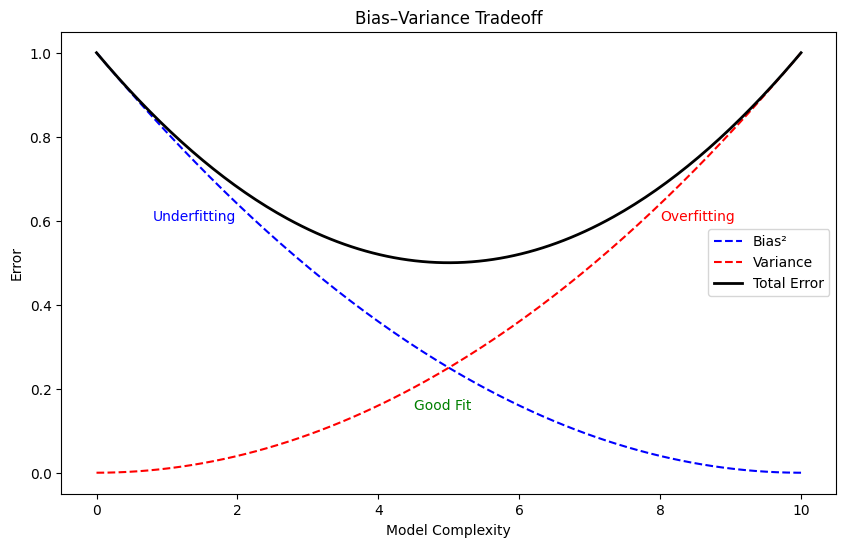

In [5]:
# Model complexity (X-axis)
complexity = np.linspace(0, 10, 200)

# Conceptual Bias² decreases with complexity
bias2 = (10 - complexity)**2 / 100  # scaled for visualization

# Variance increases with complexity
variance = complexity**2 / 100       # scaled for visualization

# Total error = Bias² + Variance
total_error = bias2 + variance

plt.figure(figsize=(10,6))
plt.plot(complexity, bias2, linestyle='--', color='blue', label="Bias²")
plt.plot(complexity, variance, linestyle='--', color='red', label="Variance")
plt.plot(complexity, total_error, color='black', linewidth=2, label="Total Error")

# Annotate key points
plt.text(0.8, 0.6, "Underfitting", fontsize=10, color='blue')
plt.text(4.5, 0.15, "Good Fit", fontsize=10, color='green')
plt.text(8, 0.6, "Overfitting", fontsize=10, color='red')

plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.title("Bias–Variance Tradeoff")
plt.legend()
plt.grid(False)
plt.show()


This graph illustrates the classic bias–variance tradeoff:

- **Bias² (Blue, dashed)**: Error due to overly simple models
  - High for simple models → underfitting
  - Decreases as model complexity increases

- **Variance (Red, dashed)**: Error due to sensitivity to training data
  - Low for simple models
  - Increases as model complexity increases → overfitting

- **Total Error (Black, solid)**: Sum of Bias² + Variance
  - Forms a U-shaped curve
  - Minimum point represents the optimal model complexity, achieving good generalization

- **Annotations**:
  - **Underfitting**: High bias, low variance
  - **Good Fit**: Balanced bias & variance, lowest total error
  - **Overfitting**: Low bias, high variance

Choosing model complexity is about balancing bias and variance to minimize total error on unseen data.  


# Root Causes

## Causes of Underfitting

Underfitting occurs when the model lacks the capacity or opportunity to learn the underlying structure of the data.

### 1. Model Too Small (Low Capacity)
- Architecture cannot represent the true function mapping inputs to outputs
- Examples:
  - Linear model for non-linear data
  - Shallow neural network for complex patterns

### 2. Too Few or Weak Features
- Input features do not contain enough signal
- Important relationships are missing or poorly encoded
- Examples:
  - Raw features without interaction terms
  - No embeddings for categorical variables

### 3. Excessive Regularization
- Regularization suppresses model weights too aggressively
- Model is forced toward overly simple solutions
- Examples:
  - High L1/L2 penalties
  - Very high dropout rates

### 4. Insufficient Training Time
- Model has not converged
- Optimization stops before meaningful patterns are learned
- Examples:
  - Too few epochs
  - Early stopping triggered prematurely

## Causes of Overfitting

Overfitting occurs when the model learns noise or dataset-specific artifacts instead of general patterns.

### 1. Model Too Large (Excess Capacity)
- Model has more parameters than necessary
- Can perfectly fit training data, including noise
- Examples:
  - Deep networks on small datasets

### 2. Too Little Training Data
- Dataset does not sufficiently represent the true data distribution
- Model memorizes instead of generalizing

### 3. Training for Too Many Epochs
- Model continues optimizing beyond the point of generalization
- Noise is gradually learned

### 4. Lack of Regularization
- No constraints on model complexity
- Weights grow freely, capturing spurious correlations
- Examples:
  - No dropout
  - No weight decay

# How Practitioners Fix It

## Fix Underfitting
- Increase model capacity
- Add features
- Train longer
- Reduce regularization

## Fix Overfitting
- More data
- Regularization (L2, Dropout)
- Early stopping
- Simpler model


# How Practitioners Fix It

## Fixing Underfitting

Underfitting means the model cannot learn the training data well enough. The goal is to increase learning capacity and signal.

### 1. Increase Model Capacity
- Use deeper or wider architectures
- Add non-linear layers or attention mechanisms
- Move from linear → tree-based → neural models when appropriate
- Result:
  - Training loss decreases further
  - Validation loss follows

### 2. Add or Improve Features
- Engineer domain-relevant features
- Use embeddings for categorical variables
- Let the model learn representations (CNNs, Transformers)
- Result:
  - Both losses drop due to richer signal

### 3. Train Longer or Optimize Better
- Increase number of epochs
- Use learning rate schedules to ensure convergence
- Avoid premature early stopping
- Result:
  - Training loss fully converges instead of plateauing early

### 4. Reduce Regularization Strength
- Lower L1/L2 penalties
- Reduce dropout rates
- Relax aggressive data augmentation
- Result:
  - Model regains flexibility to fit patterns

## Fixing Overfitting

Overfitting means the model fits training data too well but fails to generalize. The goal is to **control variance and prevent memorization**.

### 1. Increase Effective Data Size
- Collect more real data when possible
- Apply data augmentation (images, text, time-series)
- Use transfer learning or pretrained models
- Result:
  - Validation loss decreases and stabilizes

### 2. Add Regularization
- L2 (weight decay) to penalize large weights
- Dropout to prevent co-adaptation of neurons
- Label smoothing for classification
- Result:
  - Smaller generalization gap

### 3. Apply Early Stopping
- Stop training when validation loss stops improving
- Restore best-performing weights
- Result:
  - Prevents learning noise in later epochs

### 4. Simplify the Model
- Reduce depth, width, or number of parameters
- Remove unnecessary layers or features
- Choose simpler architectures when data is limited
- Result:
  - Less capacity to memorize noise

# Key Takeaways from Day 16

- Training loss alone is misleading
- Validation loss reveals generalization
- Underfitting = model too simple
- Overfitting = model too complex
- Bias and Variance:
  - Bias: Error from oversimplifying assumptions (underfitting).  
  - Variance: Error from being too sensitive to training data (overfitting).  
- Good models balance bias and variance
- Loss curves are a diagnostic tool, not decoration

---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
